In [ ]:
# Importarcion librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Cargar dataSet 
dataSet = pd.read_csv('https://raw.githubusercontent.com/JohamSMC/electiva4/master/dataSets/dataSet-horseColic.txt', sep=' ', na_values=['?'])
dataSet

In [ ]:
# Información DataSet
dataSet.info()

In [ ]:
# Eliminación de atributos
dataSet = dataSet.drop(['surgery'],axis=1)
dataSet = dataSet.drop(['Hospital_Number'],axis=1)
dataSet = dataSet.drop(['type_of_lesion_1'],axis=1)
dataSet = dataSet.drop(['type_of_lesion_2'],axis=1)
dataSet = dataSet.drop(['type_of_lesion_3'],axis=1)
dataSet = dataSet.drop(['cp_data'],axis=1)
dataSet.head()

In [ ]:
# Valores de la clase
dataSet.outcome.value_counts()

In [ ]:
# Estadisticas descriptivas de dataSet
statistics = dataSet.describe()
print(statistics)

In [ ]:
# Limpieza de datos perdidos en el atriburo "outcome" por el minimo valor
dataSet.outcome = dataSet.outcome.fillna(1.0)

# Limpieza de los demas datos por la media
for column in dataSet:
  missing_data = dataSet.loc[:,column].isna()
  dataSet.loc[missing_data,column]= statistics.loc['mean',column]

dataSet.head()

In [ ]:
# Separa atributos de la clase("outcome")

# Cambio tipo de variablde de outcome de int a string
dataSet.outcome = dataSet.outcome.astype(str)

# Cambia todo los "outcome" de valor 3.0 a 2.0 ya que:
# 1 = Vivo
# 2 = Muerto
# 3 = Eeutanasia
dataSet.outcome = dataSet.outcome.replace({'3.0':2.0})

In [3]:
# Cargar dataSet con SMOTE de Knime y con limpieza de datos
dataSet = pd.read_csv('https://raw.githubusercontent.com/JohamSMC/electiva4/master/dataSets/dataSet-horse-colic-KnimeSMOTE.csv', sep=',', na_values=['?'])
dataSet

,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,pain,peristalsis,abdominal_distension,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_PH,rectal_examination_-_feces,abdomen,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion
0,1.0,38.500000,66.0,28.000000,3.0,3.0,3.000000,2.000000,5.000000,4.000000,4.000000,2.0,2.000000,5.0,3.000000,5.000000,45.000000,8.400000,2.000000,3.000000,2,2.0
1,1.0,39.200000,88.0,20.000000,2.0,2.0,4.000000,1.000000,3.000000,4.000000,2.000000,2.0,2.000000,5.0,4.000000,2.000000,50.000000,85.000000,2.000000,2.000000,2,2.0
2,1.0,38.300000,40.0,24.000000,1.0,1.0,3.000000,1.000000,3.000000,3.000000,1.000000,2.0,2.000000,5.0,1.000000,1.000000,33.000000,6.700000,2.000000,3.000000,1,2.0
3,9.0,39.100000,164.0,84.000000,4.0,1.0,6.000000,2.000000,2.000000,4.000000,4.000000,1.0,2.000000,5.0,3.000000,4.000000,48.000000,7.200000,3.000000,5.300000,2,1.0
4,1.0,37.300000,104.0,35.000000,2.0,2.0,6.000000,2.000000,3.000000,3.000000,2.000000,2.0,2.000000,5.0,3.000000,4.000000,74.000000,7.400000,2.000000,3.000000,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1.0,38.600000,45.0,16.000000,2.0,1.0,2.000000,1.000000,1.000000,1.000000,2.000000,2.0,2.000000,5.0,1.000000,1.000000,43.000000,58.000000,2.000000,3.000000,1,2.0
896,1.0,38.458766,40.0,17.649373,1.0,1.0,1.412343,1.000000,2.206172,1.412343,1.000000,2.0,2.000000,5.0,2.587657,1.793828,36.175313,54.567850,2.000000,3.000000,1,2.0
897,1.0,38.420759,40.0,19.169658,1.0,1.0,1.792415,1.000000,2.396207,1.792415,1.000000,2.0,2.000000,5.0,2.207585,1.603793,35.415171,43.108703,2.000000,3.000000,1,2.0
898,1.0,37.133860,100.0,26.535439,3.0,3.0,3.422573,1.422573,3.845146,3.422573,3.422573,3.0,1.845146,5.0,4.000000,4.000000,50.845146,6.253544,2.577427,3.230971,1,1.0


In [4]:
# Se separa el atributo objetivo(target) en "y" y los demas atributos en "X"
X = dataSet.drop(['outcome'],axis=1)
y = dataSet['outcome']

# **Splitting Data and SMOTE**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 123)

# Smote
#from imblearn.over_sampling import SMOTE 
#sm = SMOTE(random_state = 12345) 
#X_train, y_train= sm.fit_sample(X_train, y_train) 

# **Árbol de decisión**

Links de Ayuda:


*   https://scikit-learn.org/stable/modules/tree.html
*   https://www.datacamp.com/community/tutorials/decision-tree-classification-python



In [6]:
#clf = DecisionTreeClassifier(criterion="entropy")
clf = DecisionTreeClassifier(criterion="gini")
# Entrenar Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predecir la respuesta para el conjunto de datos de prueba
y_pred = clf.predict(X_test)

In [7]:
# Resultados

#print("Numbero de observaciones mal etiquetadas del total de %d observaciones : %d" %(X_test.shape[0], (y_test != y_pred).sum()))
print("Numero de datos en test:",X_test.shape[0])
print("Numero de aciertos:",metrics.accuracy_score(y_test,y_pred,normalize=False))
print("Numero de desaciertos:",(y_test != y_pred).sum())
print("Exactitud(Accuracy):",metrics.accuracy_score(y_test,y_pred))

# Matriz de Confución
print("\n\t---Matriz de Confución Árbol de decisión---")
# print(metrics.confusion_matrix(y_test,y_pred))
VN,FP,FN,VP = metrics.confusion_matrix(y_test,y_pred).ravel()
print("VN \t FP")
print(VN," \t ",FP)
print("FN \t VP")
print(FN," \t ",VP)

Numero de datos en test: 270
Numero de aciertos: 241
Numero de desaciertos: 29
Exactitud(Accuracy): 0.8925925925925926

	---Matriz de Confución Árbol de decisión---
VN 	 FP
149  	  15
FN 	 VP
14  	  92


## *Grafico del Arbol de Decisión*

[Text(196.8788006756757, 209.6742857142857, 'X[8] <= 3.135\ngini = 0.485\nsamples = 630\nvalue = [370, 260]'),
 Text(123.99476351351352, 194.14285714285714, 'X[16] <= 51.261\ngini = 0.358\nsamples = 416\nvalue = [319, 97]'),
 Text(72.67195945945947, 178.61142857142858, 'X[2] <= 72.414\ngini = 0.243\nsamples = 346\nvalue = [297, 49]'),
 Text(39.0222972972973, 163.07999999999998, 'X[1] <= 37.074\ngini = 0.168\nsamples = 291\nvalue = [264, 27]'),
 Text(20.359459459459462, 147.54857142857142, 'X[8] <= 1.974\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(15.835135135135136, 132.01714285714286, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(24.883783783783787, 132.01714285714286, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(57.68513513513514, 147.54857142857142, 'X[20] <= 1.004\ngini = 0.142\nsamples = 285\nvalue = [263, 22]'),
 Text(33.932432432432435, 132.01714285714286, 'X[15] <= 4.034\ngini = 0.325\nsamples = 88\nvalue = [70, 18]'),
 Text(22.621621621621625, 116.485714285714

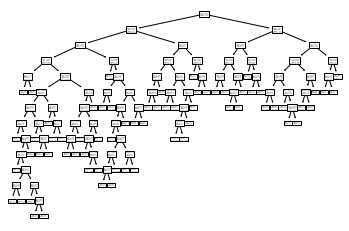

In [8]:
from sklearn import tree
tree.plot_tree(clf) 

In [9]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("HorseColic") 


'HorseColic.pdf'

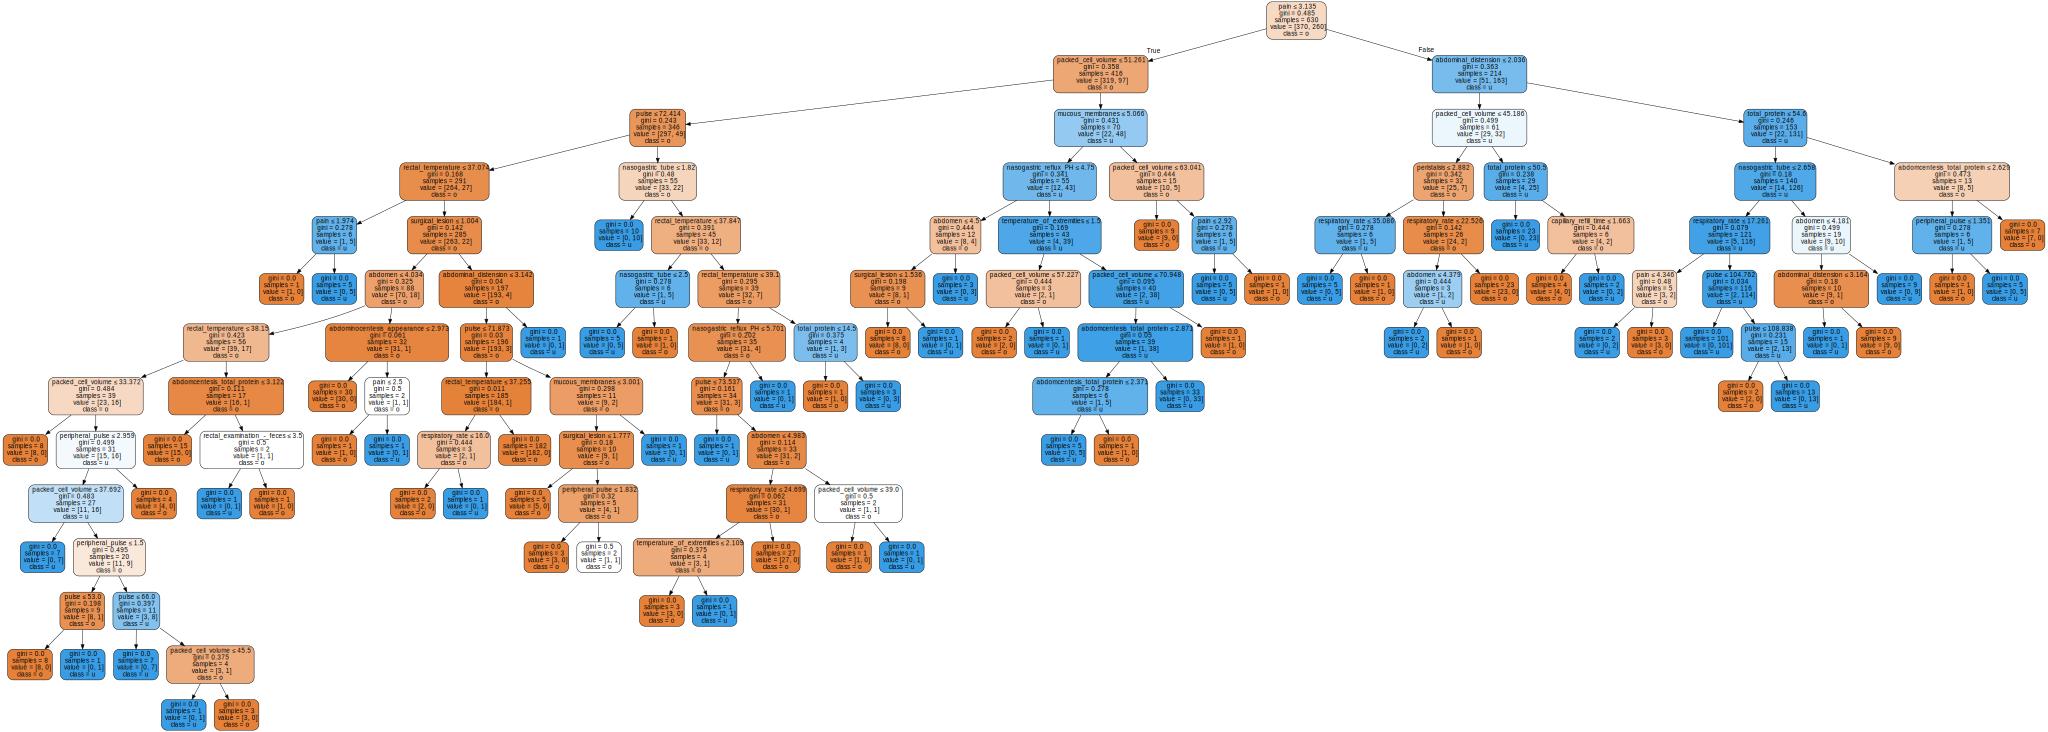

In [10]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                       feature_names=list(X),  
                        class_names="outcome",  
                        filled=True, rounded=True,  
                        special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# **Gaussian Naive Bayes**

Links de ayuda:


*   https://scikit-learn.org/stable/modules/naive_bayes.html
*   https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn




In [11]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [12]:
# Resultados

#print("Numbero de observaciones mal etiquetadas del total de %d observaciones : %d" %(X_test.shape[0], (y_test != y_pred).sum()))
print("Numero de datos en test:",X_test.shape[0])
print("Numero de aciertos:",metrics.accuracy_score(y_test,y_pred,normalize=False))
print("Numero de desaciertos:",(y_test != y_pred).sum())
print("Exactitud(Accuracy):",metrics.accuracy_score(y_test,y_pred))

# Matriz de Confución
print("\n\t---Matriz de Confución Naive Bayes---")
# print(metrics.confusion_matrix(y_test,y_pred))
VN,FP,FN,VP = metrics.confusion_matrix(y_test,y_pred).ravel()
print("VN \t FP")
print(VN," \t ",FP)
print("FN \t VP")
print(FN," \t ",VP)

Numero de datos en test: 270
Numero de aciertos: 206
Numero de desaciertos: 64
Exactitud(Accuracy): 0.762962962962963

	---Matriz de Confución Naive Bayes---
VN 	 FP
130  	  34
FN 	 VP
30  	  76


# ***OneR***

Links de ayuda:


*   https://www.programmersought.com/article/1245627604/


In [13]:
n_samples, n_features = X.shape
attribute_means = X.mean(axis=0)
assert attribute_means.shape == (n_features,)
X_d = np.array(X >= attribute_means, dtype='int')

In [14]:
from collections import defaultdict
from operator import itemgetter

def train(X, y_true, feature):  
    # Check that variable is a valid number
    n_samples, n_features = X.shape
    assert 0 <= feature < n_features
    # Get all of the unique values that this variable has
    values = set(X[:,feature])
    # Stores the predictors array that is returned
    predictors = dict()
    errors = []
    for current_value in values:
        most_frequent_class, error = train_feature_value(X, y_true, feature, current_value)
        predictors[current_value] = most_frequent_class
        errors.append(error)
    # Compute the total error of using this feature to classify on
    total_error = sum(errors)
    return predictors, total_error
# Compute what our predictors say each sample is based on its value
#y_predicted = np.array([predictors[sample[feature]] for sample in X])
def train_feature_value(X, y_true, feature, value):
    # The four input parameters are data set, category array, selected feature index value and feature value
    # Create a simple dictionary to count how frequency they give certain predictions
    class_counts = defaultdict(int)
    # Iterate through each sample and count the frequency of each class/value pair
    for sample, y in zip(X, y_true):
        if sample[feature] == value:
            class_counts[y] += 1
    # Now get the best one by sorting (highest first) and choosing the first item
    sorted_class_counts = sorted(class_counts.items(), key=itemgetter(1), reverse=True)
    most_frequent_class = sorted_class_counts[0][0]
    # The error is the number of samples that do not classify as the most frequent class
    # *and* have the feature value.
    n_samples = X.shape[1]
    error = sum([class_count for class_value, class_count in class_counts.items()
                 if class_value != most_frequent_class])
    return most_frequent_class, error

In [15]:
# Now, we split into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X_d, y, test_size = 0.3, random_state = 123)
# Smote
#X_train, y_train= sm.fit_sample(X_train, y_train) 

In [16]:
# Compute all of the predictors
all_predictors = {variable: train(X_train, y_train, variable) for variable in range(X_train.shape[1])}
errors = {variable: error for variable, (mapping, error) in all_predictors.items()}
# Now choose the best and save that as "model"
# Sort by error
best_variable, best_error = sorted(errors.items(), key=itemgetter(1))[0]
#print("The best model is based on variable {0} and has error {1:.2f}".format(best_variable, best_error))

# Choose the bset model
model = {'variable': best_variable,
         'predictor': all_predictors[best_variable][0]}

def predict(X_test, model):
    variable = model['variable']
    predictor = model['predictor']
    y_pred = np.array([predictor[int(sample[variable])] for sample in X_test])
    return y_pred

y_pred = predict(X_test, model)

In [18]:
# Resultados

#print("Numbero de observaciones mal etiquetadas del total de %d observaciones : %d" %(X_test.shape[0], (y_test != y_pred).sum()))
print("Numero de datos en test:",X_test.shape[0])
print("Numero de aciertos:",metrics.accuracy_score(y_test,y_pred,normalize=False))
print("Numero de desaciertos:",(y_test != y_pred).sum())
print("Exactitud(Accuracy):",metrics.accuracy_score(y_test,y_pred))
print("\n\t---Matriz de Confución OneR---")
# print(metrics.confusion_matrix(y_test,y_pred))
VN,FP,FN,VP = metrics.confusion_matrix(y_test,y_pred).ravel()
print("\nVP \t FN")
print(VP," \t ",FN)
print("FP \t VN")
print(FP," \t ",VN)

Numero de datos en test: 270
Numero de aciertos: 193
Numero de desaciertos: 77
Exactitud(Accuracy): 0.7148148148148148

	---Matriz de Confución OneR---

VP 	 FN
56  	  50
FP 	 VN
27  	  137
